<a href="https://colab.research.google.com/github/Ruthvik-B/Ruthvik-B/blob/main/ANN_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving ANN emissions.csv to ANN emissions.csv


Epoch 1/100
58/58 [==============================] - 1s 5ms/step - loss: 2532.6357 - val_loss: 968.9500
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 422.4918 - val_loss: 319.1304
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 253.7907 - val_loss: 271.2032
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 219.8577 - val_loss: 247.9234
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 201.1560 - val_loss: 230.5006
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 183.1991 - val_loss: 211.8118
Epoch 7/100
58/58 [==============================] - 0s 4ms/step - loss: 165.3392 - val_loss: 194.6021
Epoch 8/100
58/58 [==============================] - 0s 4ms/step - loss: 150.9479 - val_loss: 182.2043
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 140.4235 - val_loss: 171.7667
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss

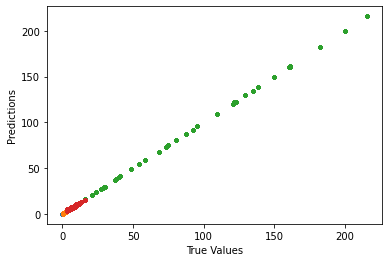

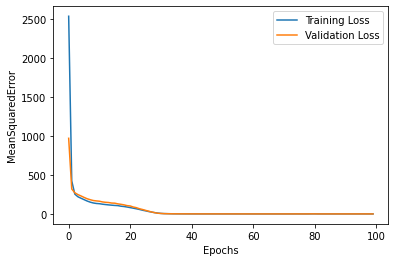

18/18 [==============================] - 0s 2ms/step


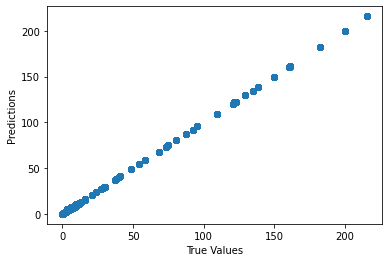

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               500       
                                                                 
 dense_25 (Dense)            (None, 100)               10100     
                                                                 
 dense_26 (Dense)            (None, 100)               10100     
                                                                 
 dense_27 (Dense)            (None, 4)                 404       
                                                                 
Total params: 21,104
Trainable params: 21,104
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from tensorflow.keras import layers
#from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()

data = pd.read_csv('ANN emissions.csv')
X = data[['Ethanol%','Methanol%','Gasoline%','RPM']].values
Y = data[['CO', 'CO2', 'HC', 'NO']].values
X=sc.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=100,activation="relu"))
ann.add(tf.keras.layers.Dense(units=100,activation="relu"))
ann.add(tf.keras.layers.Dense(units=100,activation="relu"))
#ann.add(tf.keras.layers.Dense(units=1000,activation="relu"))
#ann.add(tf.keras.layers.Dense(units=1000,activation="relu"))
#ann.add(tf.keras.layers.Dense(units=1000,activation="relu"))
#ann.add(tf.keras.layers.Dense(units=1000,activation="relu"))
ann.add(tf.keras.layers.Dense(units=4))

ann.compile(optimizer="adam",loss="MeanSquaredError")
history=ann.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val))
predictions = ann.predict(X)
corr_matrix = np.corrcoef(Y, predictions)
corr = corr_matrix[0,1]
R_sq = corr**2
print(R_sq)

print(ann.predict(sc.transform([[0,0,100,1000]])))

prediction = pd.DataFrame(predictions, columns=['CO.','CO2.','HC.','NO.']).to_csv('ANN emissions.csv')
#np.savetxt(r"C:\Users\RUTHVIK\Desktop\research papers\ANN\prediction.csv",predictions, delimiter=',')
#np.genfromtxt(r"C:\Users\RUTHVIK\Desktop\research papers\ANN\prediction.csv", delimiter=',')

plt.plot(Y, predictions, '.')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MeanSquaredError')
plt.legend()
plt.show()

# Test the model and plot the regression plot for testing data
Y_pred = ann.predict(X_test)
plt.scatter(Y_test, Y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

ann.summary()